<a href="https://colab.research.google.com/github/MahletTesfaye/EDA-analysis/blob/main/EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
data = sns.load_dataset("titanic")

In [150]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [153]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [152]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
data['survived'].unique()

array([0, 1])

In [155]:
#Clean the data check if their are null values in the data
data.isnull()
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [171]:
print("Threshhold:",len(data)*0.5)
print("Not null values in deck column:", data["deck"].notna().sum())
print("Null values in deck column:", data["deck"].isna().sum())

Threshhold: 445.5
Not null values in deck column: 203
Null values in deck column: 688


In [172]:
#if we have many null values
threshold = len(data) * 0.5 # Drop columns with fewer than 50% non-null values (at least 50% of the data must not be null)--- the threshold is about the non-null values
data_cleaned = data.dropna(axis=1, thresh=threshold) # In this case deck column has dropped as it has less than 50% non null values.
data_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [173]:
#Clean the data check if their are null values in the data_cleaned
data_cleaned.isnull()
data_cleaned.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


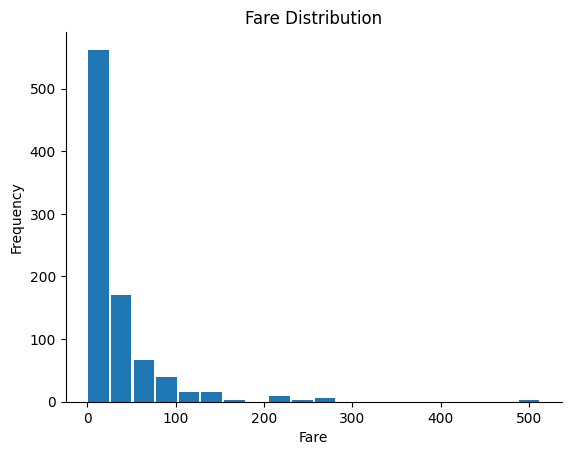

In [176]:
# @title Fare
data_cleaned['fare'].plot(kind='hist', bins=20, rwidth=0.9, title='Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

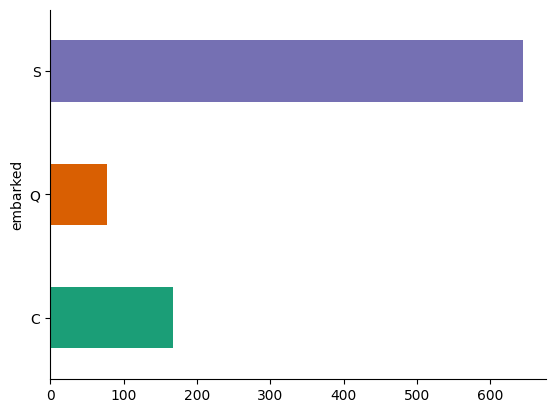

In [181]:
# @title embarked

from matplotlib import pyplot as plt
import seaborn as sns
data_cleaned.groupby('embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [130]:
# Print some basic information about the DataFrame
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None


In [148]:
data_cleaned.drop(["embark_town", "age"], axis = 1, inplace=True)

<ipython-input-148-8d92991bf0dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(["embark_town", "age"], axis = 1, inplace=True)


In [149]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   embarked    889 non-null    object  
 7   class       891 non-null    category
 8   who         891 non-null    object  
 9   adult_male  891 non-null    bool    
 10  alive       891 non-null    object  
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(4)
memory usage: 65.5+ KB


(0.0, 2500.0)

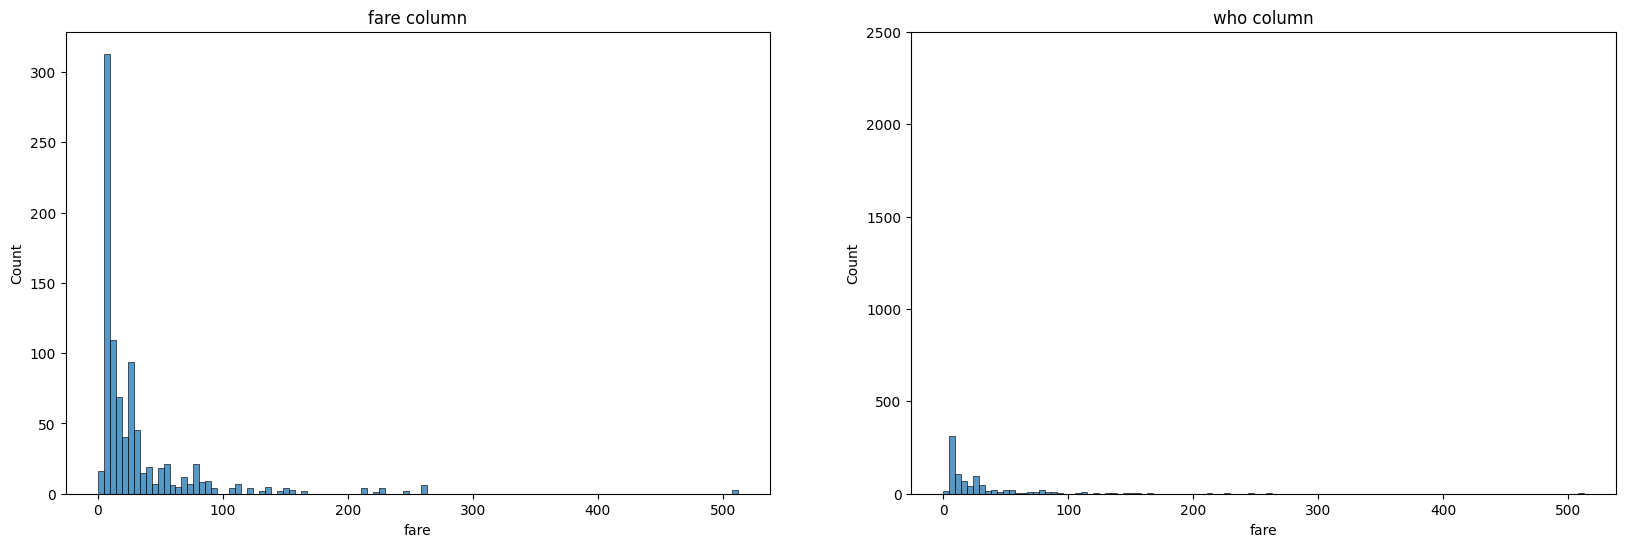

In [177]:
#Univariant Analysis
# univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(data['fare'], ax=ax[0])
ax[0].set_title("fare column")
sns.histplot(data['fare'], ax=ax[1])
ax[1].set_title("who column")
plt.ylim(0, 2500)

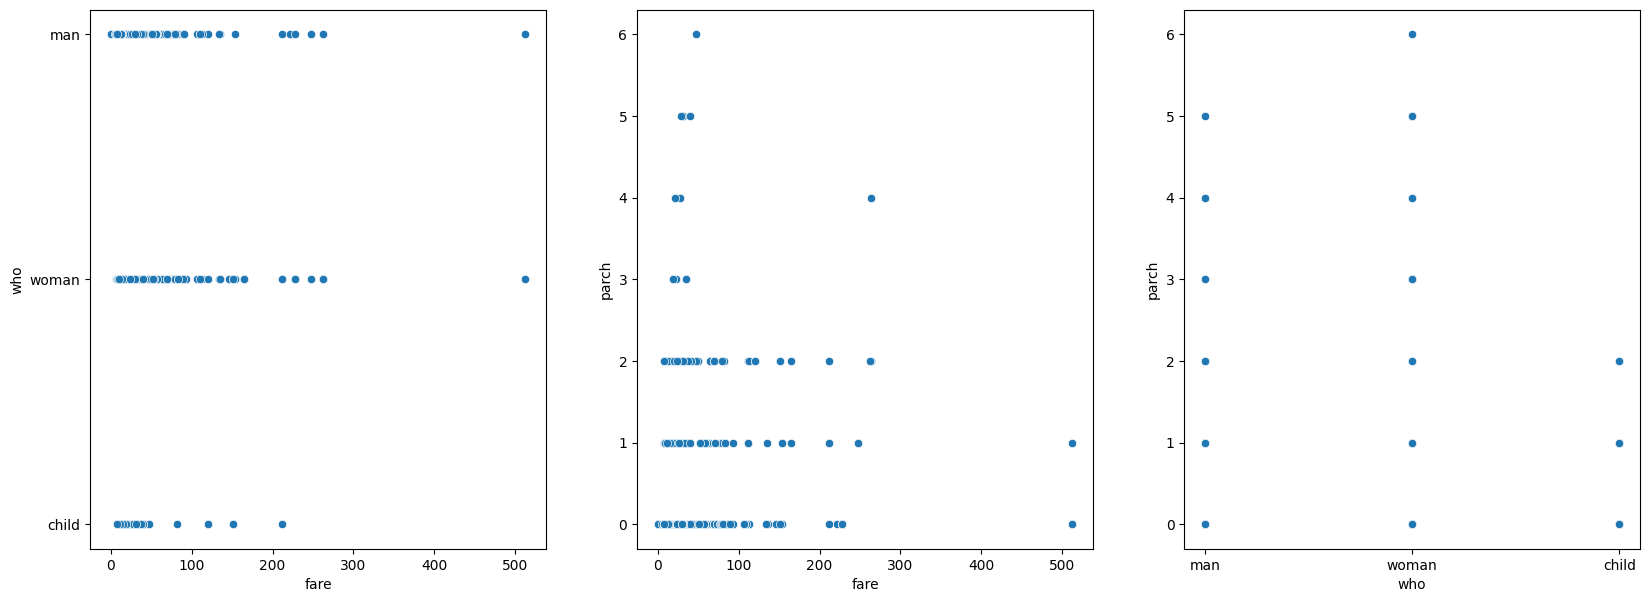

In [179]:
a4_dims = (20, 7)
fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
sns.scatterplot(x="fare", y="who", ax=axs[0], data=data)
sns.scatterplot(x="fare", y="parch", ax=axs[1], data=data)
sns.scatterplot(x="who", y="parch", ax=axs[2], data=data)

plt.show()
